## 1. Clustering

In [1]:
import mglearn

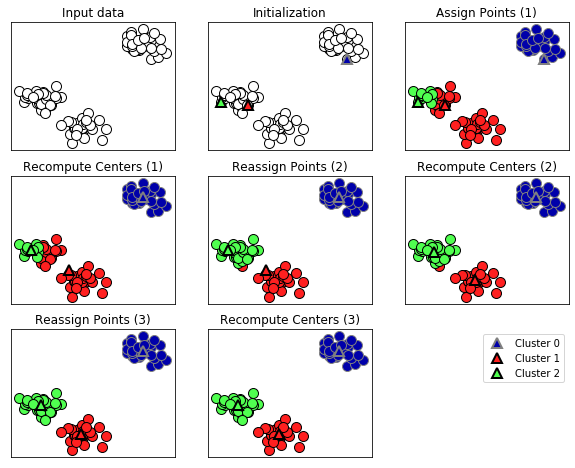

In [2]:
mglearn.plots.plot_kmeans_algorithm()

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

from sklearn.datasets import make_blobs

### Pembangkitan Data

In [4]:
# data dengan 200 sampel dan 2 kolom dengan 4 titik pusat kelompok
data_mentah = make_blobs(n_samples = 200, n_features = 2, centers = 6, cluster_std = 100, random_state = 100)

In [5]:
data_mentah

(array([[-1.85314847e+02, -3.39442350e+00],
        [-9.74629111e+01,  3.13181630e+01],
        [ 7.64529822e+01, -3.69165690e+01],
        [-1.52268164e+02,  1.76839357e+01],
        [ 7.36334322e+01, -1.21873426e+02],
        [ 4.92967041e+01, -5.12750591e+01],
        [-2.64285854e+01, -3.37119371e+01],
        [ 4.49497742e+00, -9.43149670e+01],
        [-2.00110593e+01, -2.41819631e+02],
        [-1.83250731e+02,  3.21767103e+01],
        [-5.60964022e+01, -9.17641344e+01],
        [-1.54720171e+01, -1.24257100e+02],
        [-1.00629609e+01,  1.12007958e+02],
        [-1.41866173e+01, -3.10429616e+01],
        [ 1.62766265e+02,  1.49727905e+02],
        [ 5.05367310e+01, -9.82716593e+01],
        [ 4.41856342e+01, -7.63109842e+01],
        [-2.23500718e+02, -2.83000087e+01],
        [-5.98303877e+01, -5.69870667e+01],
        [-5.14872565e+01, -1.43418911e+02],
        [-1.97040753e+02,  7.25626503e+01],
        [-1.31148829e+02,  1.64094670e+01],
        [-3.41997551e+01,  5.255

In [6]:
df = pd.DataFrame(data_mentah[0], columns = ['Feature 1', 'Feature 2'])
df['Class'] = data_mentah[1]

In [7]:
df.head()

,Feature 1,Feature 2,Class
0,-185.314847,-3.394423,5
1,-97.462911,31.318163,0
2,76.452982,-36.916569,1
3,-152.268164,17.683936,1
4,73.633432,-121.873426,3


In [8]:
df['Class'].value_counts()

1    34
0    34
5    33
4    33
3    33
2    33
Name: Class, dtype: int64

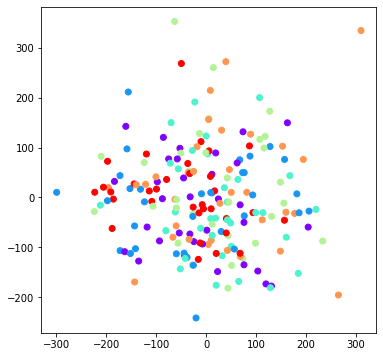

In [9]:
plt.figure(figsize = (6,6))
plt.scatter(df['Feature 1'], df['Feature 2'], c = df['Class'], cmap = 'rainbow')

### Normalisasi

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [11]:
df[['Feature 1', 'Feature 2']] = scaler.fit_transform(df[['Feature 1', 'Feature 2']])

In [12]:
df.head()

,Feature 1,Feature 2,Class
0,-1.711418,-0.011778,5
1,-0.896505,0.329621,0
2,0.716735,-0.341468,1
3,-1.404877,0.195529,1
4,0.690581,-1.177021,3


### KMeans

In [13]:
from sklearn.cluster import KMeans

In [14]:
kmeans = KMeans(n_clusters = 7, random_state = 10)

In [15]:
# kmeans berorientasi hanya untuk features
kmeans.fit(df.drop('Class', axis = 1))

KMeans(n_clusters=7, random_state=10)

In [16]:
# mengecek titik sentroid
kmeans.cluster_centers_

array([[-0.29397701,  2.51179706],
       [-0.08052928, -1.08629868],
       [ 0.23110163, -0.08551698],
       [-1.46961793,  0.01739788],
       [ 1.51643268, -0.76622222],
       [ 1.21170242,  1.16933406],
       [-0.33883491,  0.93128081]])

In [17]:
# melihat hasil clustering
kmeans.labels_

array([3, 3, 2, 3, 1, 2, 2, 1, 1, 3, 1, 1, 6, 2, 5, 1, 1, 3, 1, 1, 3, 3,
       6, 2, 3, 2, 6, 2, 3, 6, 5, 5, 2, 1, 3, 2, 6, 4, 1, 2, 6, 2, 1, 3,
       4, 3, 3, 3, 2, 1, 4, 6, 3, 3, 5, 3, 2, 4, 6, 5, 3, 0, 3, 3, 5, 6,
       4, 5, 2, 1, 6, 1, 5, 1, 2, 5, 3, 4, 1, 1, 3, 3, 0, 6, 1, 2, 1, 4,
       1, 4, 5, 1, 2, 6, 6, 5, 1, 4, 2, 2, 5, 1, 5, 1, 3, 2, 6, 2, 2, 1,
       1, 1, 6, 1, 1, 2, 1, 2, 2, 2, 2, 5, 4, 0, 6, 3, 3, 2, 2, 6, 1, 4,
       2, 1, 2, 2, 0, 6, 1, 5, 2, 4, 6, 4, 0, 1, 3, 6, 2, 2, 6, 6, 1, 4,
       6, 2, 1, 6, 6, 4, 4, 4, 4, 1, 3, 0, 4, 2, 5, 3, 3, 5, 2, 5, 0, 2,
       6, 2, 1, 3, 3, 3, 2, 2, 2, 5, 1, 4, 1, 1, 4, 6, 3, 2, 2, 6, 3, 6,
       1, 4], dtype=int32)

In [18]:
df_kmeans7 = pd.DataFrame(data_mentah[0], columns = ['Feature 1', 'Feature 2'])
df_kmeans7['Cluster'] = kmeans.labels_

In [19]:
df_kmeans7.head()

,Feature 1,Feature 2,Cluster
0,-1.711418,-0.011778,3
1,-0.896505,0.329621,3
2,0.716735,-0.341468,2
3,-1.404877,0.195529,3
4,0.690581,-1.177021,1


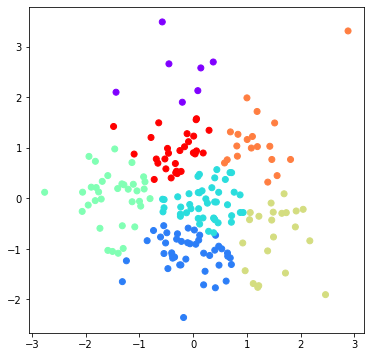

In [20]:
plt.figure(figsize = (6,6))
plt.scatter(df['Feature 1'], df['Feature 2'], c = df_kmeans7['Cluster'], cmap = 'rainbow')

In [21]:
aa = df_kmeans7.groupby('Cluster')

In [22]:
aa.describe()

Feature 1                                                              \
            count      mean       std       min       25%       50%       75%   
Cluster                                                                         
0             7.0 -0.293977  0.605244 -1.435517 -0.512725 -0.201389  0.115120   
1            43.0 -0.080529  0.503291 -1.317576 -0.395142 -0.103320  0.355137   
2            45.0  0.231102  0.400956 -0.568619 -0.040057  0.265463  0.464834   
3            35.0 -1.469618  0.432938 -2.764486 -1.782301 -1.404877 -1.124891   
4            22.0  1.516433  0.413384  0.923199  1.207422  1.476841  1.730256   
5            19.0  1.211702  0.531250  0.584265  0.828755  1.103615  1.446165   
6            29.0 -0.338835  0.394277 -1.481141 -0.525730 -0.309677  0.004297   

                  Feature 2                                                    \
              max     count      mean       std       min       25%       50%   
Cluster                                                                         
0        0.374277       7.0  2.511797  0.533471  1.904607  2.118027  2.583238   
1        0.711730      43.0 -1.086299  0.367393 -2.356694 -1.270754 -1.079549   
2        0.930176      45.0 -0.085517  0.323622 -0.679080 -0.341468 -0.120229   
3       -0.802343      35.0  0.017398  0.519975 -1.084765 -0.141362  0.128786   
4        2.464464      22.0 -0.766222  0.626219 -1.903938 -1.332484 -0.496006   
5        2.883791      19.0  1.169334  0.660501  0.323225  0.771413  1.032563   
6        0.296163      29.0  0.931281  0.350627  0.375919  0.691169  0.899634   

                             
              75%       max  
Cluster                      
0        2.682461  3.493759  
1       -0.830583 -0.538862  
2        0.117241  0.570589  
3        0.284515  0.979468  
4       -0.279802  0.092392  
5        1.293262  3.315573  
6        1.206868  1.578202

In [23]:
aa.std().mean()

Feature 1    0.468763
Feature 2    0.483115
dtype: float64

## 2. Cara Menentukan K Optimum

### Elbow

In [24]:
inertia_list = []

for i in range(1,50):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df.drop('Class', axis = 1))
    inertia_list.append(kmeans.inertia_)

In [25]:
inertia_list

[400.00000000000017,
 263.8424126289481,
 169.5300281086662,
 134.44740152315248,
 111.13494305493523,
 93.01025818046642,
 80.28210835572504,
 67.64374249461834,
 60.23213562577278,
 54.3907083136617,
 48.38496291704211,
 43.28730372468886,
 38.86732308219236,
 35.88606551393883,
 32.86734495423041,
 29.70881981378253,
 28.092873695992616,
 26.043994794338815,
 25.07977561985747,
 23.373926082136848,
 22.29011602959857,
 21.36551389477932,
 19.249737276933566,
 18.968746732650786,
 17.667406353103793,
 16.624611263990502,
 15.425208206291957,
 14.45628697730906,
 14.64331361965534,
 13.728592300925206,
 12.62343917715259,
 11.989611253675816,
 11.662607776556484,
 11.259695383884106,
 10.80753111105729,
 10.143486939521583,
 9.918820717697681,
 9.448925541713797,
 9.139562960863378,
 8.697975885151182,
 8.444056673708754,
 8.186631014590022,
 7.753879039020861,
 7.492460452651275,
 7.1969093445400345,
 6.963689649516209,
 6.595019673934185,
 6.371659639571499,
 5.994586222867369]

Text(0, 0.5, 'Inertia')

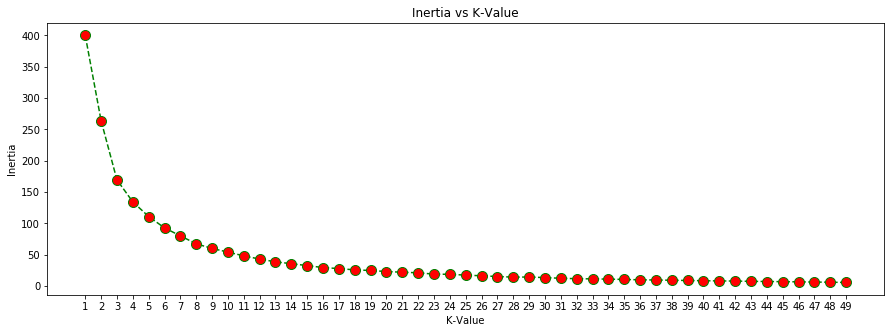

In [26]:
plt.figure(figsize = (15,5))
plt.plot(range(1,50), inertia_list, color = 'green', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize= 10)
plt.title ('Inertia vs K-Value')
plt.xticks(range(1,50))
plt.xlabel('K-Value')
plt.ylabel('Inertia')

In [27]:
kmeans_opt = KMeans(n_clusters = 4, random_state = 10)
kmeans_opt.fit(df.drop('Class', axis = 1))
df_kmeans4 = pd.DataFrame(data_mentah[0], columns = ['Feature 1', 'Feature 2'])
df_kmeans4['Cluster'] = kmeans_opt.labels_
df_kmeans4.head()

,Feature 1,Feature 2,Cluster
0,-1.711418,-0.011778,1
1,-0.896505,0.329621,1
2,0.716735,-0.341468,3
3,-1.404877,0.195529,1
4,0.690581,-1.177021,3


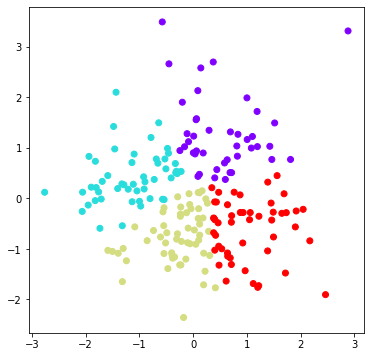

In [28]:
plt.figure(figsize = (6,6))
plt.scatter(df_kmeans4['Feature 1'], df_kmeans4['Feature 2'], c = df_kmeans4['Cluster'], cmap = 'rainbow')

### Silhoutte Coefficient

In [29]:
from sklearn.metrics import silhouette_samples

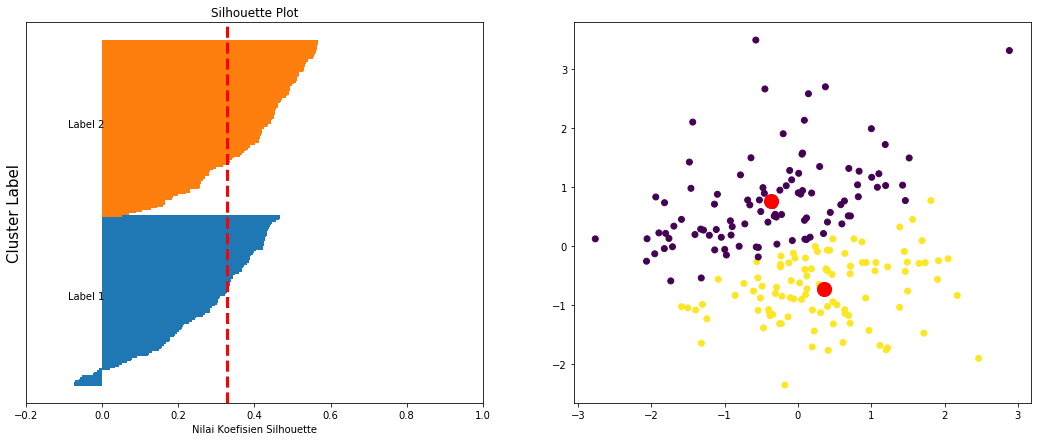

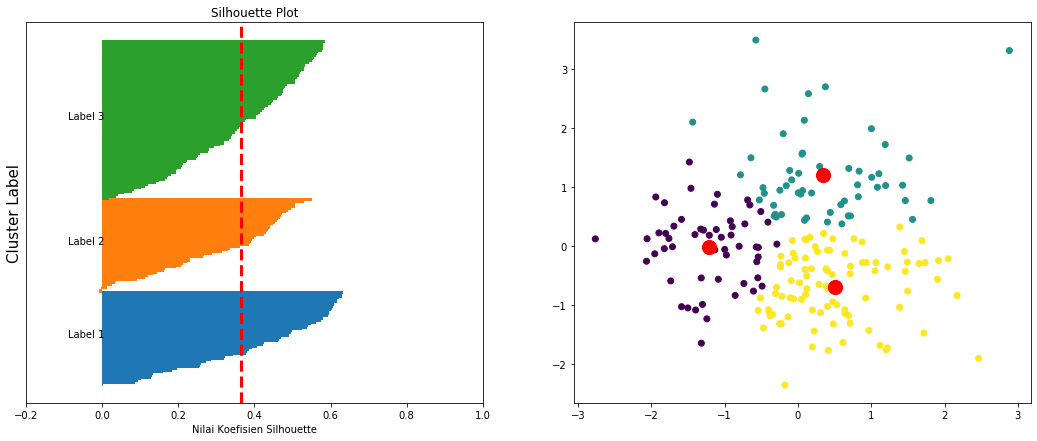

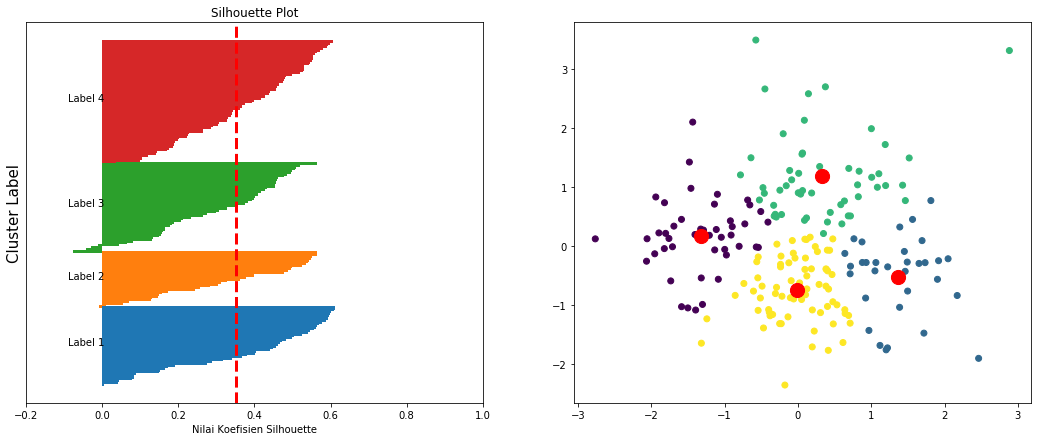

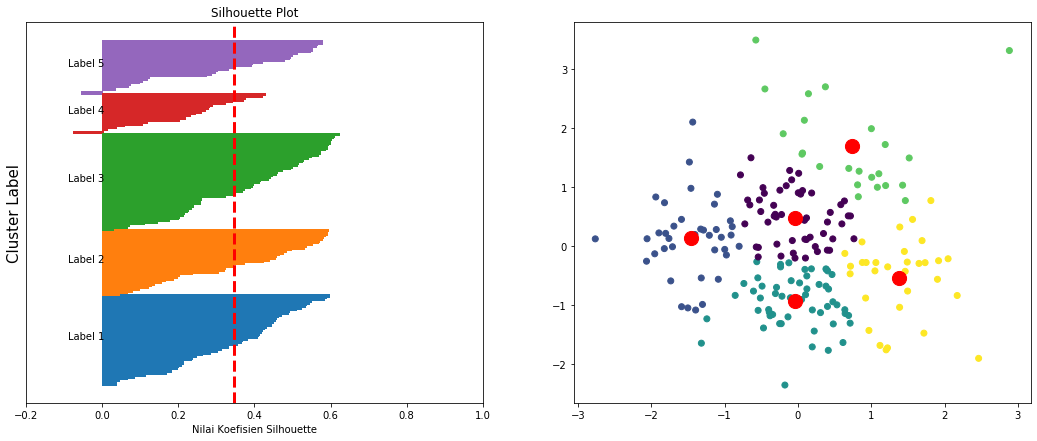

In [30]:
for i, k in enumerate(list(range(2,6))):
    fig,(ax1, ax2) = plt.subplots(1,2)
    fig.set_size_inches(18, 7)
    
    # kmeans
    kmeans = KMeans(n_clusters = k)
    labels = kmeans.fit_predict(df.drop('Class', axis = 1))
    centroids = kmeans.cluster_centers_
    
    # silhouette samples
    s_vals = silhouette_samples(df.drop('Class', axis = 1), labels)
    
    # plot 1 (silhouette)
    y_ticks = []
    ylower, yupper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_s_vals = s_vals[labels == cluster]
        cluster_s_vals.sort()
        yupper += len(cluster_s_vals)
        ax1.barh(range(ylower, yupper), cluster_s_vals, edgecolor = 'none', height = 2)
        ax1.text(-0.09, (ylower+yupper)/2, 'Label '+ str(i+1), fontsize = 10)
        ylower += len(cluster_s_vals)
    
    # average line
    avg_score = np.mean(s_vals)
    ax1.axvline(avg_score, linestyle = '--', linewidth = 3, color = 'red')
    ax1.set_yticks([])
    ax1.set_xlim(-0.2, 1)
    ax1.set_xlabel('Nilai Koefisien Silhouette')
    ax1.set_ylabel('Cluster Label', fontsize = 15)
    ax1.set_title('Silhouette Plot')
    
    # hasil cluster
    ax2.scatter(df['Feature 1'], df['Feature 2'], c = labels)
    ax2.scatter(centroids[:,0], centroids[:,1], marker = 'o', c = 'r', s = 200)

## Latihan 1

In [31]:
data1 = pd.read_csv('Mall_Customers.csv')

In [32]:
data1.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [33]:
data1 = pd.get_dummies (data = data1, drop_first = True, columns = ['Genre'])

In [34]:
data1.drop('CustomerID', axis = 1, inplace = True)

In [35]:
data1.head()

,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [36]:
scaler = StandardScaler()
df1 = scaler.fit_transform(data1)

In [37]:
inertia_list = []

for i in range(1,50):
    kmeans_d1 = KMeans(n_clusters = i)
    kmeans_d1.fit(df1)
    inertia_list.append(kmeans_d1.inertia_)

Text(0, 0.5, 'Inertia')

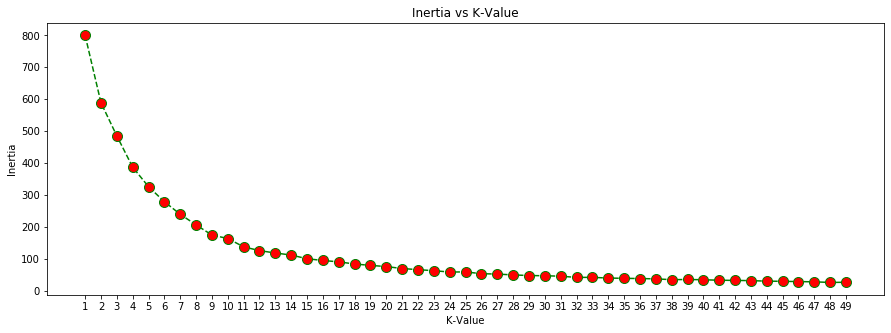

In [38]:
plt.figure(figsize = (15,5))
plt.plot(range(1,50), inertia_list, color = 'green', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize= 10)
plt.title ('Inertia vs K-Value')
plt.xticks(range(1,50))
plt.xlabel('K-Value')
plt.ylabel('Inertia')

In [39]:
kmeans_opt = KMeans(n_clusters = 5, random_state = 10)
kmeans_opt.fit(df1)
df_kmeans5 = pd.DataFrame(np.array(data1), columns = ['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4'])
df_kmeans5['Cluster'] = kmeans_opt.labels_
df_kmeans5.head()

,Feature 1,Feature 2,Feature 3,Feature 4,Cluster
0,19,15,39,1,2
1,21,15,81,1,2
2,20,16,6,0,3
3,23,16,77,0,1
4,31,17,40,0,3


In [40]:
df_kmeans5.groupby('Cluster').std().mean()

Feature 1     8.593947
Feature 2    21.610198
Feature 3    15.482761
Feature 4     0.101835
dtype: float64

In [41]:
kmeans_opt = KMeans(n_clusters = 4, random_state = 10)
kmeans_opt.fit(df1)
df_kmeans4 = pd.DataFrame(np.array(data1), columns = ['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4'])
df_kmeans4['Cluster'] = kmeans_opt.labels_
df_kmeans4.head()

,Feature 1,Feature 2,Feature 3,Feature 4,Cluster
0,19,15,39,1,0
1,21,15,81,1,0
2,20,16,6,0,1
3,23,16,77,0,3
4,31,17,40,0,3


In [42]:
df_kmeans4.groupby('Cluster').std().mean()

Feature 1     9.083612
Feature 2    26.512444
Feature 3    17.792827
Feature 4     0.000000
dtype: float64

## Latihan 2

In [43]:
data2 = sns.load_dataset('titanic')

In [44]:
data2.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [45]:
data2.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [46]:
data2 = data2.dropna()

In [47]:
data2 = data2[['pclass', 'sibsp', 'age', 'parch']]

In [48]:
scaler = StandardScaler()
df2 = scaler.fit_transform(data2)

In [49]:
inertia_list = []

for i in range(1,50):
    kmeans_d2 = KMeans(n_clusters = i)
    kmeans_d2.fit(df2)
    inertia_list.append(kmeans_d2.inertia_)

Text(0, 0.5, 'Inertia')

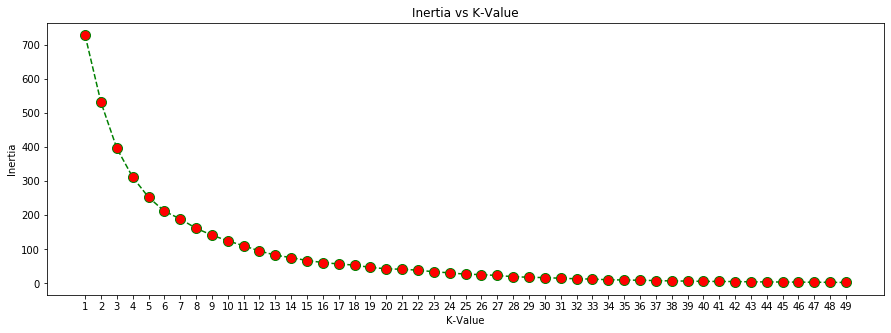

In [50]:
plt.figure(figsize = (15,5))
plt.plot(range(1,50), inertia_list, color = 'green', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize= 10)
plt.title ('Inertia vs K-Value')
plt.xticks(range(1,50))
plt.xlabel('K-Value')
plt.ylabel('Inertia')

In [51]:
kmeans_opt = KMeans(n_clusters = 5, random_state = 10)
kmeans_opt.fit(df2)
df_kmeans5 = pd.DataFrame(np.array(data2), columns = ['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4'])
df_kmeans5['Cluster'] = kmeans_opt.labels_
df_kmeans5.head()

,Feature 1,Feature 2,Feature 3,Feature 4,Cluster
0,1.0,1.0,38.0,0.0,4
1,1.0,1.0,35.0,0.0,4
2,1.0,0.0,54.0,0.0,1
3,3.0,1.0,4.0,1.0,3
4,1.0,0.0,58.0,0.0,1


In [52]:
df_kmeans5.groupby('Cluster').std().mean()

Feature 1     0.271101
Feature 2     0.352752
Feature 3    12.452263
Feature 4     0.503713
dtype: float64

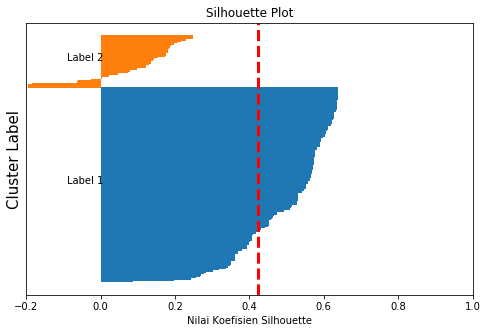

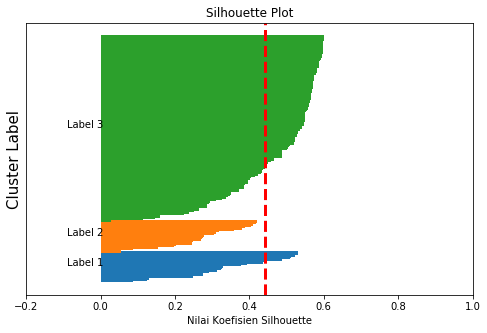

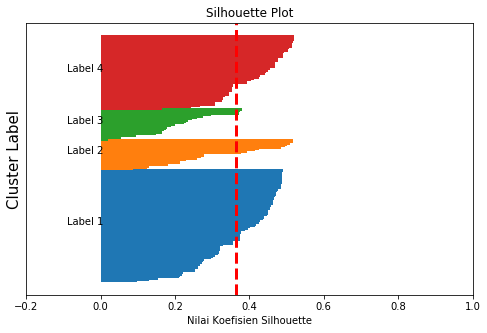

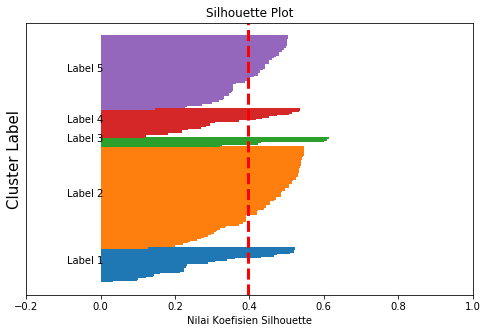

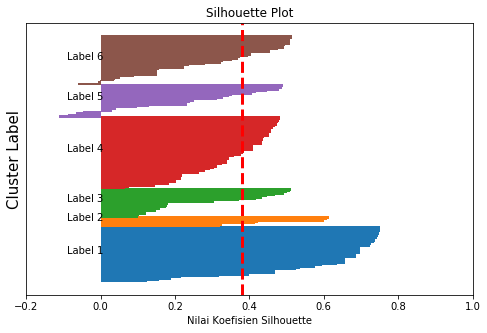

In [53]:
for i, k in enumerate(list(range(2,7))):
    fig,(ax1) = plt.subplots(1)
    fig.set_size_inches(8, 5)
    
    # kmeans
    kmeans = KMeans(n_clusters = k)
    labels = kmeans.fit_predict(df2)
    centroids = kmeans.cluster_centers_
    
    # silhouette samples
    s_vals = silhouette_samples(df2, labels)
    
    # plot 1 (silhouette)
    y_ticks = []
    ylower, yupper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_s_vals = s_vals[labels == cluster]
        cluster_s_vals.sort()
        yupper += len(cluster_s_vals)
        ax1.barh(range(ylower, yupper), cluster_s_vals, edgecolor = 'none', height = 2)
        ax1.text(-0.09, (ylower+yupper)/2, 'Label '+ str(i+1), fontsize = 10)
        ylower += len(cluster_s_vals)
    
    # average line
    avg_score = np.mean(s_vals)
    ax1.axvline(avg_score, linestyle = '--', linewidth = 3, color = 'red')
    ax1.set_yticks([])
    ax1.set_xlim(-0.2, 1)
    ax1.set_xlabel('Nilai Koefisien Silhouette')
    ax1.set_ylabel('Cluster Label', fontsize = 15)
    ax1.set_title('Silhouette Plot')